<a href="https://colab.research.google.com/github/lauraanormann/codex/blob/main/Kopi_af_sol_instr%C3%A5ling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Konvertering af solenergi via. solceller på RUC**

Solceller har i forskellige omfang mere eller mindte udladning af energi, hvilket gør det essentielt at kigge på: *hvornår solceller udleder mest energi og på hvilke tidspunkter?

Koderne skal hjælpe med at give indblik i, hvornår solceller på året, månederne, dagen og timerne har den bedst mulig effektivitet. Med disse koder får vi et godt fundament for vores projekt (grøn teknologi på RUC), da det kan åbne op for nye strategier ift. mere udnyttelse af solcelleenergi.

Graferne har også til formål at give et visuelt overblik på solceller.
For at gøre det mere specifikt og relevant for vores projekt har vi taget udgangspunkt i solcellerne på ruc og koordinater hertil.


In [1]:
# import bibliotek
!pip install pysolar
import pysolar
import datetime
import pytz
import pandas as pd
import random
import pysolar.solar as solar
import matplotlib.pyplot as plt
import calendar
import matplotlib.image as mpimg
import matplotlib.animation as animation
import numpy as np
import time
import plotly.express as px
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
help(solar.get_sun_earth_distance)
!pip install pysolar

Help on function get_sun_earth_distance in module pysolar.solar:

get_sun_earth_distance(jme)



Denne kode illustere hvordan

In [ ]:
!pip install pysolar

# Definerer bygningernes solcelleareal i m² samt dens gennemsnitligt forbrug målt i Wh
bygninger = {
    "Bygning 28": {"solcelleareal": 500, "forbrug": 580146},
    "Bygning 13,14,25,26,27": {"solcelleareal": 800, "forbrug": 71999},
    "Bygning 01,02,03": {"solcelleareal": 600, "forbrug": 42971},
    "Bygning 15": {"solcelleareal": 750, "forbrug": 759711},
    "Bygning 36": {"solcelleareal": 400, "forbrug": 119822},
    "Bygning 39 (gartnergård)": {"solcelleareal": 300, "forbrug": 18845},
    "Bygning 06": {"solcelleareal": 200, "forbrug": 20456},
    "Bygning 20": {"solcelleareal": 350, "forbrug": 6838},
    "Bygning 21": {"solcelleareal": 250, "forbrug": 15961},
    "Bygning 22": {"solcelleareal": 300, "forbrug": 16696},
}


def opdater_solcelle_data():
    while True:  # Løbende opdatering
        current_time = datetime.datetime.now(pytz.utc)
        hour = current_time.hour

        # Simuler solhøjde og stråling
        if 6 <= hour <= 18: #Målt fra solen står op (kl 06) til solen går ned (kl 18)
            altitude = random.uniform(10, 70) # Solenshøjde målt i grader
            radiation = random.uniform(100, 900) # Watt i m² (solstråler)
        else: # solhøjde og stråling mellem fra kl 18 til kl 6 (solen er gået ned)
            altitude = 0 #solhøjde
            radiation = 0 #solstråler
        data = []
        total_production = 0 # Der bliver ikke produceret strøm
        total_forbrug = 0 # Der er ikke noget forbrug

        for bygning, info in bygninger.items():
            solcelleareal = info["solcelleareal"]
            forbrug = info["forbrug"]

            if altitude > 0: #Hvis det er nat (altitude ≤ 0), er produktionen 0 Wh.
                production_wh = solcelleareal * radiation
            else:
                production_wh = 0

            total_production += production_wh
            total_forbrug += forbrug


            # Bygningens data bliver gemt
            data.append({
                "Bygning": bygning,
                "Solcelleareal (m²)": solcelleareal,
                "Solproduktion (Wh)": production_wh,
                "Forbrug (Wh)": forbrug,
                "Status": "Dækker forbrug" if production_wh >= forbrug else "Bruger netstrøm"
            }) #Hvis bygningen producerer nok strøm til sit eget forbrug, får den status: "Dækker forbrug".

        # The following block was incorrectly indented
        if total_production >= total_forbrug:
            ruc_status = "RUC kører 100% på grøn energi" # Hvis solcellerne producerer mere end forbruget
        elif total_production > 0:
            ruc_status = "RUC kører delvist på grøn energi" # hvis solcellerne dækker noget af forbruget
        else:
            ruc_status = "RUC bruger kun netstrøm (ingen solproduktion)" # Solcellerne dækker ikke forbruget


       # Viser total produktion, forbrug og RUC's energistatus.
        data.append({
            "Bygning": "Samlet RUC",
            "Solcelleareal (m²)": sum(b["solcelleareal"] for b in bygninger.values()), # Beregner det samlede solcelleareal med
            "Solproduktion (Wh)": total_production,
            "Forbrug (Wh)": total_forbrug,
            "Status": ruc_status
        })

        df = pd.DataFrame(data)

        # Vis den opdaterede tabel
        display(df)

        print(f"Data opdateret: {current_time.strftime('%Y-%m-%d %H:%M:%S')}")

        # Opdater hver time (3600 sekunder = 1 time)
        time.sleep(3600)

        # Kør funktionen
opdater_solcelle_data()

,Bygning,Solcelleareal (m²),Solproduktion (Wh),Forbrug (Wh),Status
0,Bygning 28,500,0,580146,Bruger netstrøm
1,"Bygning 13,14,25,26,27",800,0,71999,Bruger netstrøm
2,"Bygning 01,02,03",600,0,42971,Bruger netstrøm
3,Bygning 15,750,0,759711,Bruger netstrøm
4,Bygning 36,400,0,119822,Bruger netstrøm
5,Bygning 39 (gartnergård),300,0,18845,Bruger netstrøm
6,Bygning 06,200,0,20456,Bruger netstrøm
7,Bygning 20,350,0,6838,Bruger netstrøm
8,Bygning 21,250,0,15961,Bruger netstrøm
9,Bygning 22,300,0,16696,Bruger netstrøm


Data opdateret: 2025-03-14 20:31:44


,Bygning,Solcelleareal (m²),Solproduktion (Wh),Forbrug (Wh),Status
0,Bygning 28,500,0,580146,Bruger netstrøm
1,"Bygning 13,14,25,26,27",800,0,71999,Bruger netstrøm
2,"Bygning 01,02,03",600,0,42971,Bruger netstrøm
3,Bygning 15,750,0,759711,Bruger netstrøm
4,Bygning 36,400,0,119822,Bruger netstrøm
5,Bygning 39 (gartnergård),300,0,18845,Bruger netstrøm
6,Bygning 06,200,0,20456,Bruger netstrøm
7,Bygning 20,350,0,6838,Bruger netstrøm
8,Bygning 21,250,0,15961,Bruger netstrøm
9,Bygning 22,300,0,16696,Bruger netstrøm


Data opdateret: 2025-03-14 21:31:44


,Bygning,Solcelleareal (m²),Solproduktion (Wh),Forbrug (Wh),Status
0,Bygning 28,500,0,580146,Bruger netstrøm
1,"Bygning 13,14,25,26,27",800,0,71999,Bruger netstrøm
2,"Bygning 01,02,03",600,0,42971,Bruger netstrøm
3,Bygning 15,750,0,759711,Bruger netstrøm
4,Bygning 36,400,0,119822,Bruger netstrøm
5,Bygning 39 (gartnergård),300,0,18845,Bruger netstrøm
6,Bygning 06,200,0,20456,Bruger netstrøm
7,Bygning 20,350,0,6838,Bruger netstrøm
8,Bygning 21,250,0,15961,Bruger netstrøm
9,Bygning 22,300,0,16696,Bruger netstrøm


Data opdateret: 2025-03-14 22:31:44


In [ ]:
# Koordinater for RUC (København)
latitude = 55.6761
longitude = 12.5683

# Liste over tidspunkter for en hel dag (2025-02-28)
date = datetime.datetime(2025, 2, 28, tzinfo=datetime.timezone.utc)
times = [date + datetime.timedelta(minutes=i) for i in range(0, 24 * 60, 10)]  # Hvert 10. minut

# Beregning af solhøjde og strålingsintensitet i løbet af den antagede dag
altitudes = [solar.get_altitude(latitude, longitude, time) for time in times]
radiation = [solar.radiation.get_radiation_direct(time, alt) if alt > 0 else 0 for time, alt in zip(times, altitudes)]

# Ændring på tidspunkter til timer for bedre visning
hours = [t.hour + t.minute / 60 for t in times]

# Plot solhøjde (Figur 1)
plt.figure(figsize=(10, 5))
plt.plot(hours, altitudes, label="Solhøjde (grader)", linestyle="--")

# Definerer x- og y-aksen (Figur 1)
plt.xlabel("Tid på dagen (timer)")
plt.ylabel("Solhøjde (grader)")
plt.title("Solhøjde i København 2025")
plt.legend()
plt.grid()

# Plot solindstråling (Figur 2)
plt.figure(figsize=(10, 5))
plt.plot(hours, radiation, label="Solindstråling (W/m²)", color="orange")

# Definerer x- og y-aksen (Figur 2)
plt.xlabel("Tid på dagen (timer)")
plt.ylabel("Solindstråling (W/m²)")
plt.title("Direkte solindstråling i København 2025")
plt.legend()
plt.grid()

# Vis graferne
plt.show()


Denne kode forudser solcellernes energiforbrug for hver dag i Juni 2025: (kan ændres til de andre måneder også)

In [ ]:

# størrelse på Rucs solcelleareal (6 m²)
ruc_sol_area = 6.000

# Koordinater for RUC
latitude = 55.6761 # Nord
longitude = 12.5683 # Øst

# Perioden (måneden)
year = 2025
month = 6
days_in_month = calendar.monthrange(year, month)[1]


# Løkke for alle dage pr måneden
for day in range(1, days_in_month + 1):
    dag_prod = 0  # Starter med 0 for den pågældende dag

    # Beregning af energien for hver time i døgnet (0 til 23)
    for hour in range(0, 24):

        # datetime for hvert timetal, som følger et fast minut (5)
        date = datetime.datetime(year, month, day, hour, 5, tzinfo=datetime.timezone.utc)

        # Beregning af solhøjden for det tidspunkt
        alt = solar.get_altitude(latitude, longitude, date)

        # Når solen er over horisonten beregnes den direkte solindstråling; ellers 0
        rad = solar.radiation.get_radiation_direct(date, alt) if alt > 0 else 0

        # Summer produktionen: At gå ud fra, at hvert datapunkt repræsenterer 1 time
        dag_prod += ruc_sol_area * rad
    print(f"På dag {day} i måned {month} var den samlede produktion: {dag_prod:.2f}")


På dag 1 i måned 6 var den samlede produktion: 64402.86
På dag 2 i måned 6 var den samlede produktion: 64468.54
På dag 3 i måned 6 var den samlede produktion: 64529.69
På dag 4 i måned 6 var den samlede produktion: 64586.04
På dag 5 i måned 6 var den samlede produktion: 64637.34
På dag 6 i måned 6 var den samlede produktion: 64683.39
På dag 7 i måned 6 var den samlede produktion: 64724.01
På dag 8 i måned 6 var den samlede produktion: 64759.07
På dag 9 i måned 6 var den samlede produktion: 64788.46
På dag 10 i måned 6 var den samlede produktion: 64812.10
På dag 11 i måned 6 var den samlede produktion: 64829.91
På dag 12 i måned 6 var den samlede produktion: 64841.85
På dag 13 i måned 6 var den samlede produktion: 64847.88
På dag 14 i måned 6 var den samlede produktion: 64847.99
På dag 15 i måned 6 var den samlede produktion: 64842.16
På dag 16 i måned 6 var den samlede produktion: 64830.40
På dag 17 i måned 6 var den samlede produktion: 64812.70
På dag 18 i måned 6 var den samlede prod

Koden nedenunder forudser solcellernes energiforbrug for hver dag i månederne i 2025:

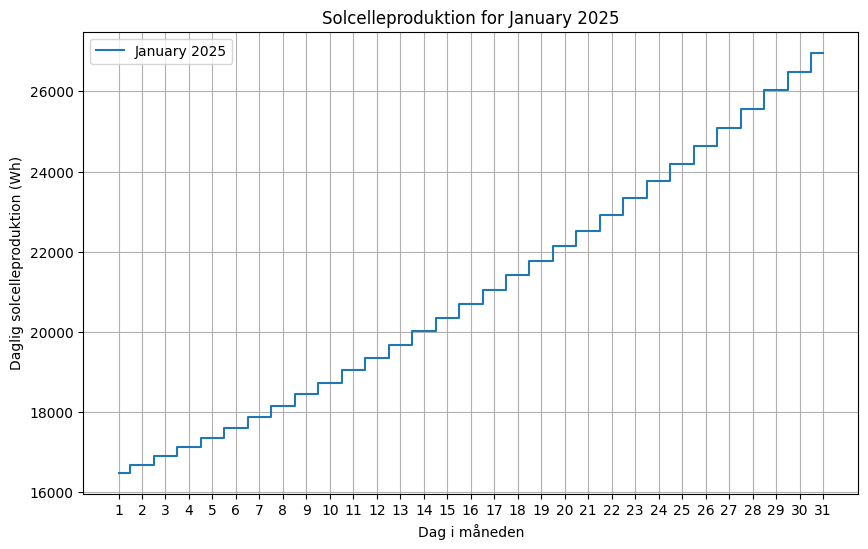

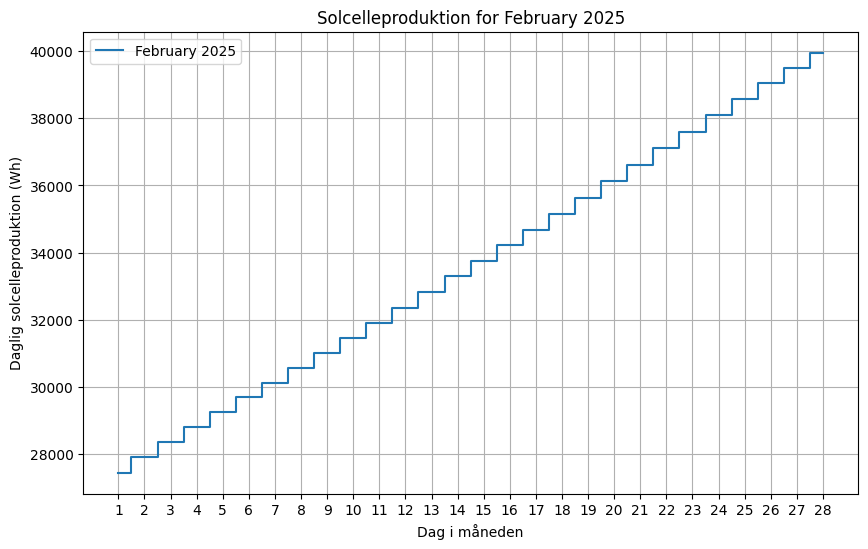

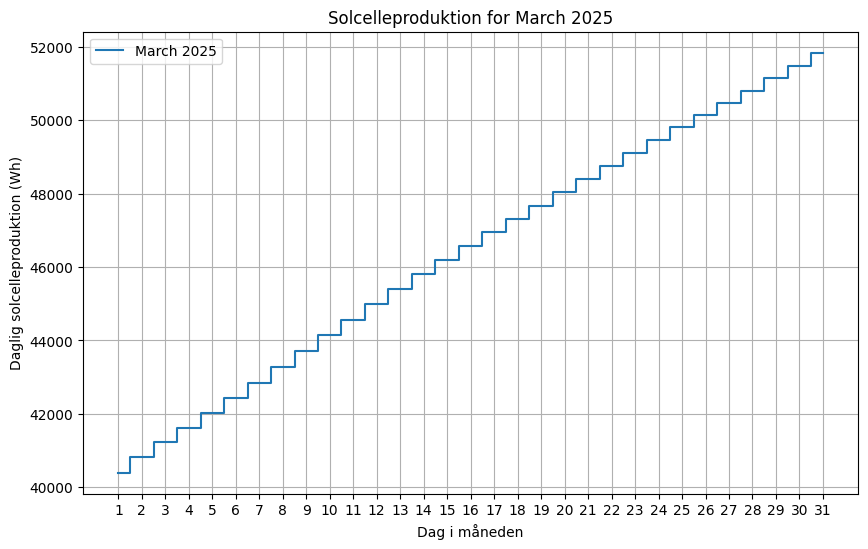

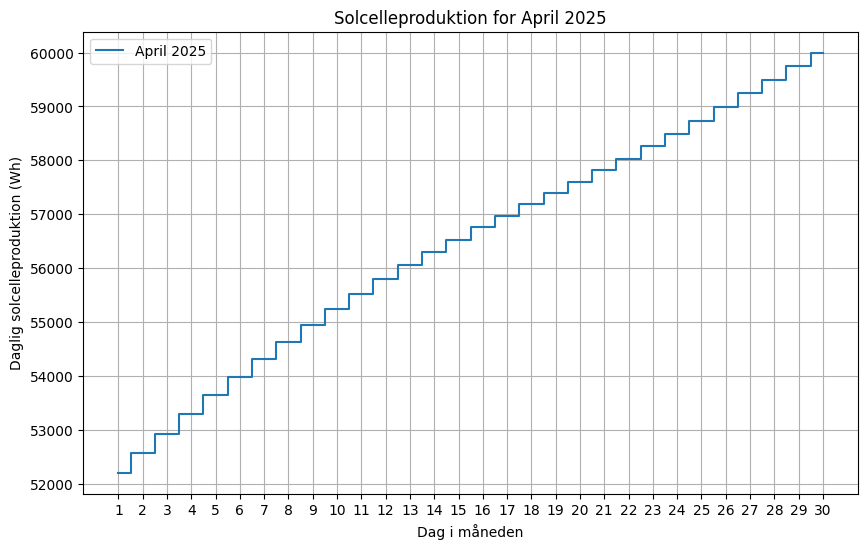

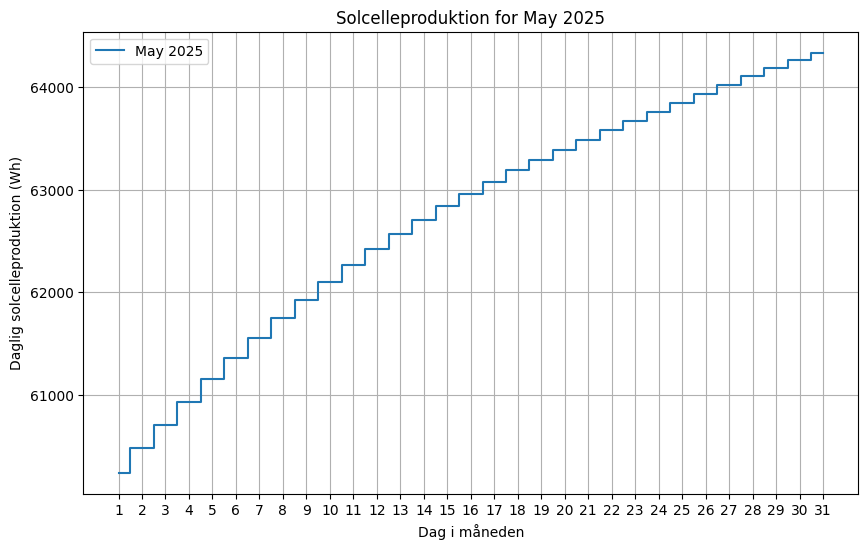

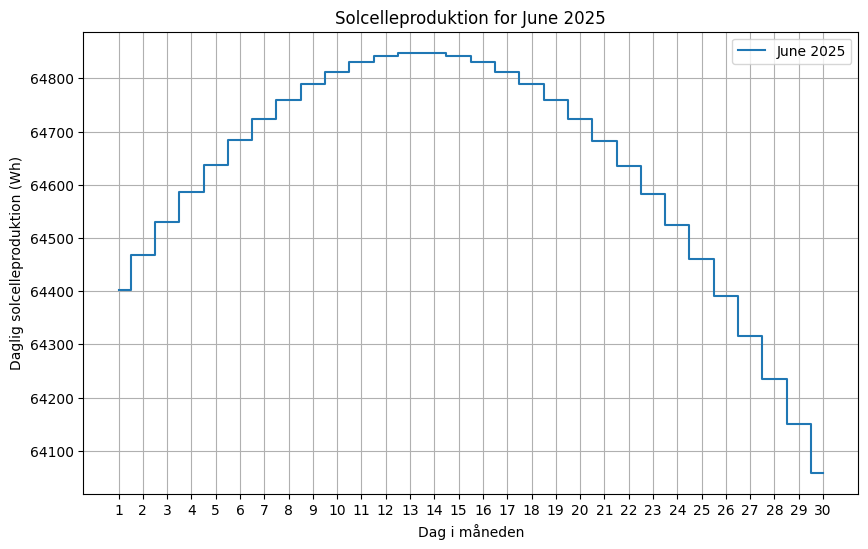

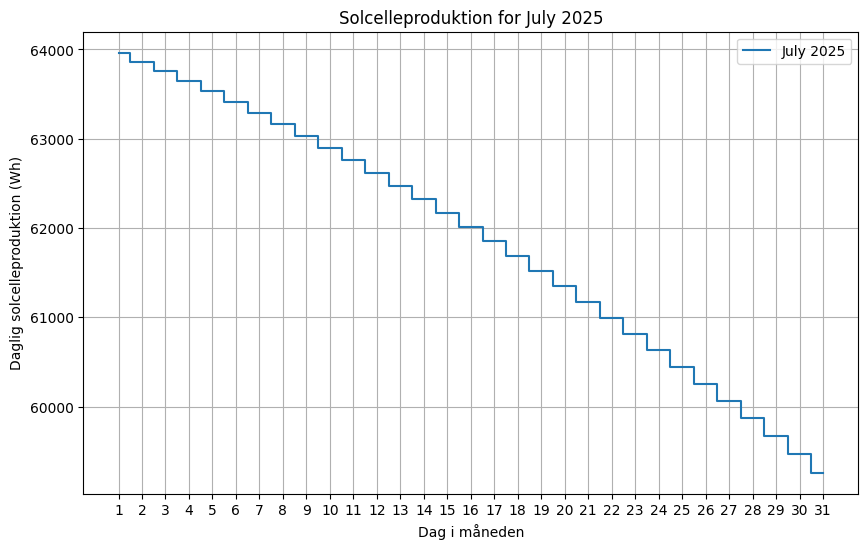

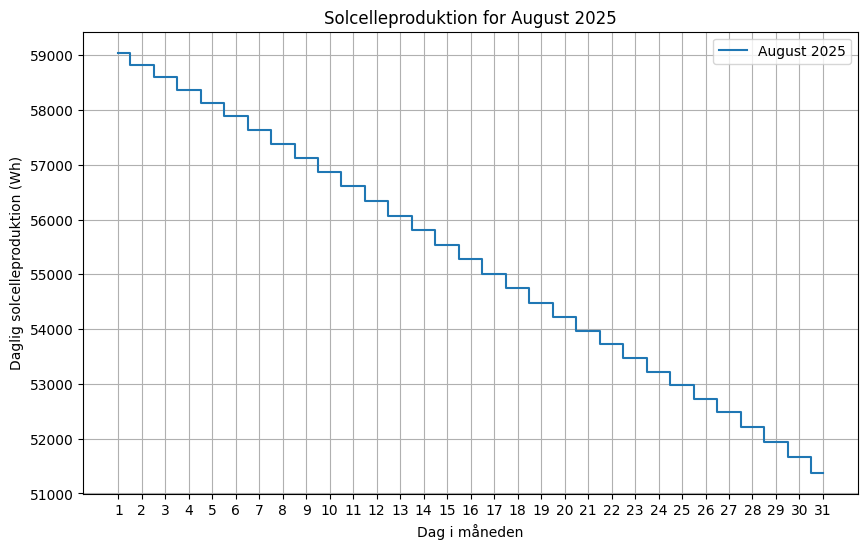

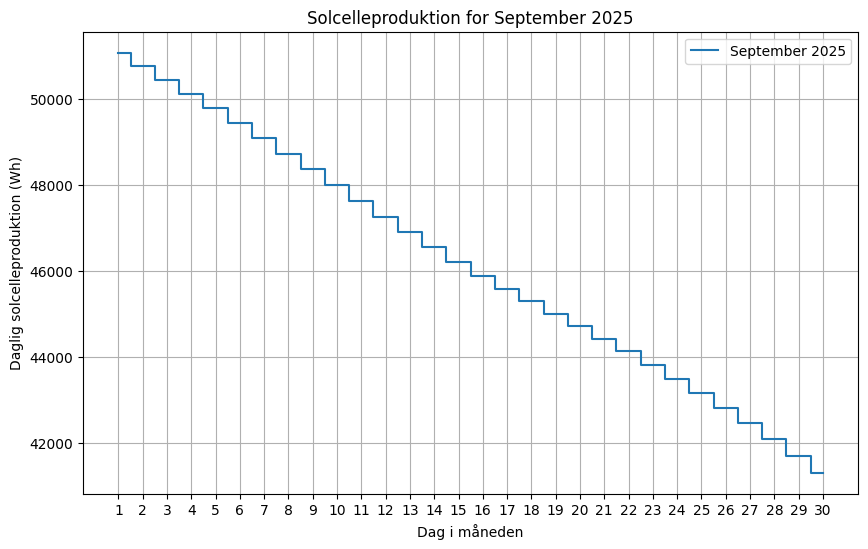

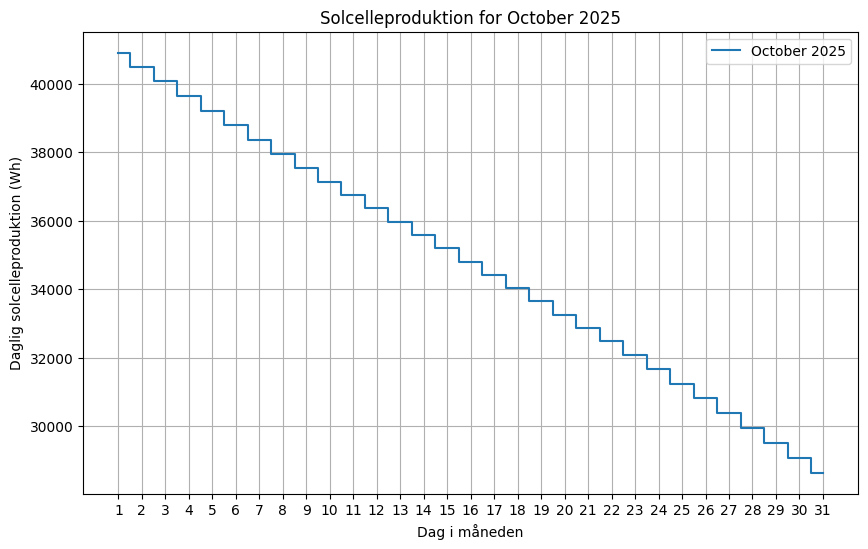

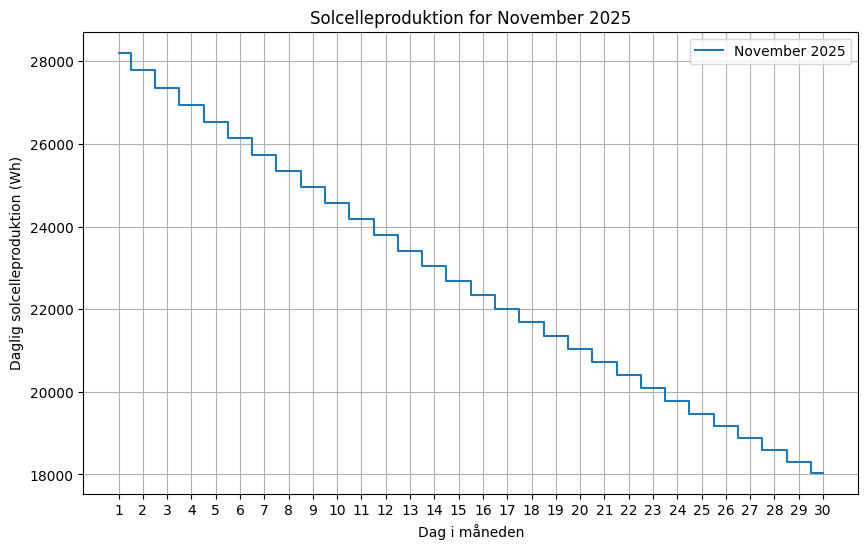

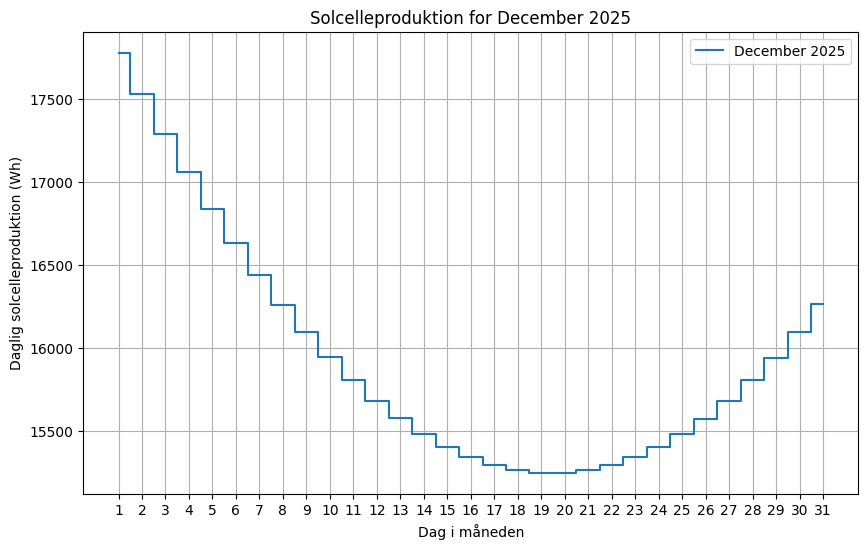

In [ ]:
# Solcellearealet (i m²) og RUC-området
ruc_sol_area = 6.000   # m²
latitude = 55.6761
longitude = 12.5683

# Vælg året
year = 2025

# Loop gennem alle måneder i året
for month in range(1, 13):
    days_in_month = calendar.monthrange(year, month)[1]  # Antal dage i den måned
    daily_production = []  # Liste til daglig produktion (Wh)
    days = []              # Liste til dagstal

    # Loop gennem alle dage i måneden
    for day in range(1, days_in_month + 1):
        day_prod = 0  # Nulstil produktionen for dagen

        # Loop gennem alle 24 timer
        for hour in range(0, 24):

            # datetime-objekt for den aktuelle dag og time (fast minut = 5)
            dt = datetime.datetime(year, month, day, hour, 5, tzinfo=datetime.timezone.utc)

            # beregning af solhøjden
            altitude = solar.get_altitude(latitude, longitude, dt)

            # Når solen er over horisonten beregnes den direkte solindstråling; ellers 0
            if altitude > 0:
                rad = solar.radiation.get_radiation_direct(dt, altitude)
            else:
                rad = 0
            # Antages at hvert timeligt datapunkt repræsenterer 1 time

            # Produktion (Wh) for dette timeinterval:
            day_prod += ruc_sol_area * rad

        # Forkortelser
        daily_production.append(day_prod)
        days.append(day)


    # Plot: den daglige produktion, den aktuelle måned: step plot
    plt.figure(figsize=(10, 6))
    plt.step(days, daily_production, where='mid', label=f"{calendar.month_name[month]} {year}")
    plt.xlabel("Dag i måneden")
    plt.ylabel("Daglig solcelleproduktion (Wh)")
    plt.title(f"Solcelleproduktion for {calendar.month_name[month]} {year}")
    plt.xticks(range(1, days_in_month + 1))
    plt.grid(True)
    plt.legend()
    plt.show()



Koden giver et visuelt blik på hvornår solcellerne er aktive og hvilke bygniner der kører på solcellenergi i aktuelt tid:

In [ ]:
# Kort over solcelleareal på RUC
def simuler_sol_data(current_time):
    if 6 <= current_time.hour <= 18:              # Målt fra solen står op (kl 06) til solen går ned (kl 18)
        altitude = random.uniform(10, 70)         # Solenshøjde målt i grader
        radiation = random.uniform(100, 900)      # Watt i m² (solstråler)

   # solhøjde og stråling fra kl 18 til kl 6 (solen er gået ned)
    else:
        altitude = 0   #solhøjde
        radiation = 0  #solstråler
    return altitude, radiation

# Centrering for RUC (juster med de rigtige koordinater for campus)
RUC_LAT = 55.652378 # Nord
RUC_LON = 12.139059 # Øst


# Viser solcelleareal og forbrug + Koordinater for bygninger
bygninger = {
    "Bygning 28": {"solcelleareal": 500, "forbrug": 580146, "lat": 55.652378, "lon": 12.139059},
    "Bygning 13": {"solcelleareal": 800, "forbrug": 71999, "lat": 55.651991, "lon": 12.137160},
    "Bygning 14": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.651923, "lon": 12.138003},
    "Bygning 25": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.651991, "lon": 12.134972},
    "Bygning 26": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.651611, "lon": 12.136177},
    "Bygning 27": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.651520, "lon": 12.138877},
    "Bygning 01": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.653540, "lon": 12.139695},
    "Bygning 02": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.652885, "lon": 12.141054},
    "Bygning 03": {"solcelleareal": 600, "forbrug": 42971, "lat": 55.653590, "lon": 12.141071},
    "Bygning 15": {"solcelleareal": 750, "forbrug": 759711, "lat": 55.652371, "lon": 12.137957},
    "Bygning 39": {"solcelleareal": 300, "forbrug": 18845, "lat": 55.652528, "lon": 12.142735},
    "Bygning 06": {"solcelleareal": 200, "forbrug": 20456, "lat": 55.653015, "lon": 12.138611},
    "Bygning 20": {"solcelleareal": 350, "forbrug": 6838, "lat": 55.653080, "lon": 12.136579},
    "Bygning 21": {"solcelleareal": 250, "forbrug": 15961, "lat": 55.653102, "lon": 12.136100},
    "Bygning 22": {"solcelleareal": 300, "forbrug": 16696, "lat": 55.653118, "lon": 12.135419},
}

# Data for bygningerne:
def generer_df():
    current_time = datetime.datetime.now(pytz.utc)
    altitude, radiation = simuler_sol_data(current_time)
    records = []
    for building, info in bygninger.items():
        solcelleareal = info["solcelleareal"]
        forbrug = info["forbrug"]
        lat = info["lat"]
        lon = info["lon"]
        produktion = solcelleareal * radiation if altitude > 0 else 0
        status = "Green" if produktion >= forbrug else "Red"
        records.append({
            "time": current_time.strftime("%H:%M"),
            "building": building,
            "production": produktion,
            "forbrug": forbrug,
            "status": status,
            "lat": lat,
            "lon": lon
        })
    return pd.DataFrame(records)


# Data for prikkerne på kortet:
while True:
    df = generer_df()
    fig = px.scatter_mapbox(
        df,
        lat="lat",
        lon="lon",
        color="status",
        hover_name="building",
        color_discrete_map={"Green": "green", "Red": "red"},
        mapbox_style="open-street-map",
        center={"lat": RUC_LAT, "lon": RUC_LON},
        zoom=19,
        title=f"Solcelleaktivitet på RUC - {df['time'].iloc[0]}"
    )
    fig.update_layout(margin={"r":0, "t":40, "l":0, "b":0})
    fig.show()



   # Opdatere hver time (3600 sekunder = 1 time)
    time.sleep(3600)
